In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**i) Data Preprocessing** \
Load the data from sklearn

In [3]:
data=fetch_california_housing()
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

Output the data to view 

In [4]:
#Converting to Dataframe format using pandas
new_data=pd.DataFrame(data.data, columns=data.feature_names)
new_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Check for missing values

In [5]:
new_data.head(20).isnull().sum().sum()

0

The data does not have any missing values. \
Start encoding and feature selection.

In [6]:
column_names=data.feature_names
target=data.target
categorical_data=new_data
numerical=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')

for feature in numerical:
  categorical_data[feature]= categorical_data[feature].cat.codes

categorical_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,12416,40,17422,4683,296,6200,37.88,-122.23
1,12411,20,15292,1747,2346,2171,37.86,-122.22
2,11941,51,18851,8436,469,9150,37.85,-122.24
3,10269,51,13297,8416,531,6102,37.85,-122.25
4,6656,51,15461,8951,538,2620,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253,39.48,-121.09
20636,3179,17,14726,13437,330,12675,39.49,-121.21
20637,1037,16,9514,10951,980,3757,39.43,-121.22
20638,1405,17,10299,12362,714,2249,39.43,-121.32


Drop the latitude and longitude details

In [7]:
categorical_data.drop('Latitude',axis=1,inplace=True)
categorical_data.drop('Longitude',axis=1,inplace=True)

Combine data with target

In [8]:
data_copy=categorical_data.copy()

#Generating dataframe from target array
dataset = pd.DataFrame({'Target':data.target})
dataset

temp_data = pd.concat([data_copy,dataset],axis=1)
temp_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
0,12416,40,17422,4683,296,6200,4.526
1,12411,20,15292,1747,2346,2171,3.585
2,11941,51,18851,8436,469,9150,3.521
3,10269,51,13297,8416,531,6102,3.413
4,6656,51,15461,8951,538,2620,3.422
...,...,...,...,...,...,...,...
20635,740,24,8473,11414,818,6253,0.781
20636,3179,17,14726,13437,330,12675,0.771
20637,1037,16,9514,10951,980,3757,0.923
20638,1405,17,10299,12362,714,2249,0.847


Slice the data

In [9]:
all_features = list(data_copy.columns)
X = data_copy.loc[:,all_features].values
y = temp_data.loc[:,['Target']].values
y

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

Standardize the features

In [10]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.88280191,  0.98214266,  1.39664548, -0.5357633 , -1.28809653,
        -0.59536054],
       [ 1.88133306, -0.60701891,  1.01265515, -1.28318843,  1.29226284,
        -1.34674917],
       [ 1.74326137,  1.85618152,  1.65426152,  0.41964764, -1.07033937,
        -0.04520009],
       ...,
       [-1.46000195, -0.92485123, -0.0289862 ,  1.05989771, -0.4271376 ,
        -1.05096799],
       [-1.35189475, -0.84539315,  0.11253136,  1.41909964, -0.76195496,
        -1.33220255],
       [-0.95618715, -1.00430931,  0.02455611,  1.36767597,  0.05117292,
        -0.46033811]])

Introduce PCA to calculate principal components

In [11]:
#Principle components
pca=PCA(n_components=5)
pc_s=pca.fit_transform(X)
#Returning Principle Components
pca_data=pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
final_data = pd.concat([pca_data,dataset],axis=1)
final_data

,PC1,PC2,PC3,PC4,PC5,Target
0,1.706911,-2.329861,0.388309,0.247375,0.401935,4.526
1,2.290929,-0.126222,0.391002,-1.953397,0.887105,3.585
2,1.435028,-2.235347,0.139335,1.380977,1.228024,3.521
3,0.444180,-2.161565,-0.067553,0.679377,1.195552,3.413
4,-0.036368,-2.252405,-0.733710,0.517531,1.120707,3.422
...,...,...,...,...,...,...
20635,-1.241566,-0.008269,-1.564952,0.308492,-0.598347,0.781
20636,0.105980,0.096488,-1.622448,1.689767,-1.211764,0.771
20637,-0.827142,0.180851,-1.893407,-0.272037,-0.803666,0.923
20638,-0.765026,-0.200239,-2.322780,-0.152386,-0.785742,0.847


Calculate variance

In [13]:
arr=pca.explained_variance_ratio_

sum =0
for i in range(0, len(arr)):    
   sum = sum + arr[i];
Variance=sum*100


print('PCA variance is '+str(Variance) +'%')

PCA variance is 96.01290140028385%


**ii)Using Seaborn library** \
Using Seabon Library to pair a plot of all attributes against the Target \


Plot Median Income vs target

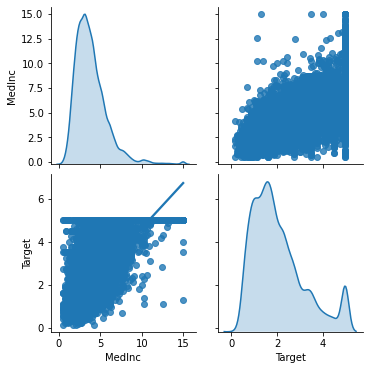

In [15]:
plot_data=pd.DataFrame(data.data, columns=data.feature_names)
target_data=pd.DataFrame({'Target':data.target})
data_MedInc=pd.concat([plot_data['MedInc'],target_data],axis=1)
data_MedInc
sns.pairplot(data_MedInc,kind='reg',diag_kind='kde')

Plot House Age vs target

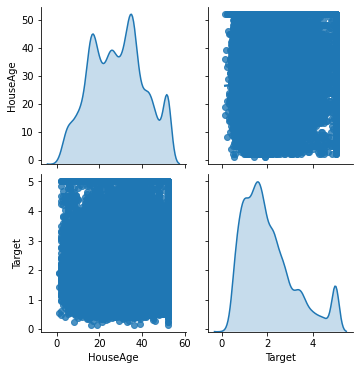

In [16]:
data_plot=pd.concat([plot_data['HouseAge'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot Average Rooms vs Target

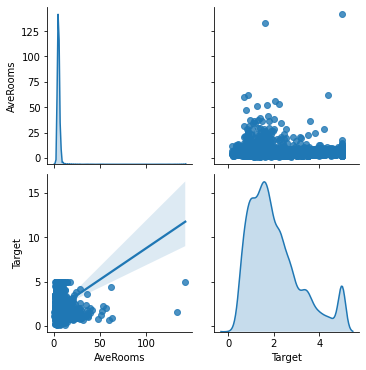

In [17]:
data_plot=pd.concat([plot_data['AveRooms'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot Average Bedrooms vs Target

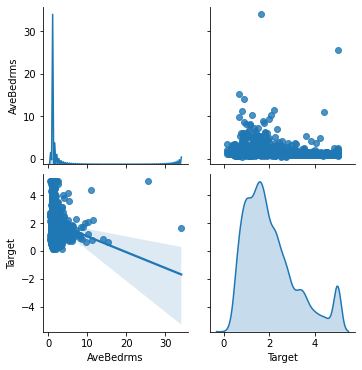

In [18]:
data_plot=pd.concat([plot_data['AveBedrms'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot Population vs Target

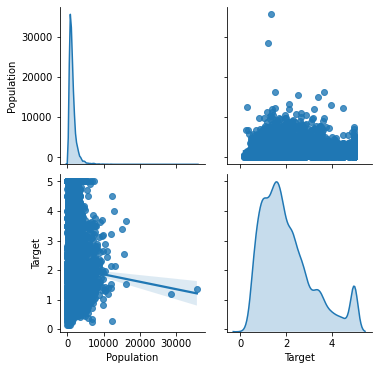

In [19]:
data_plot=pd.concat([plot_data['Population'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

Plot Average Occupancy vs Target

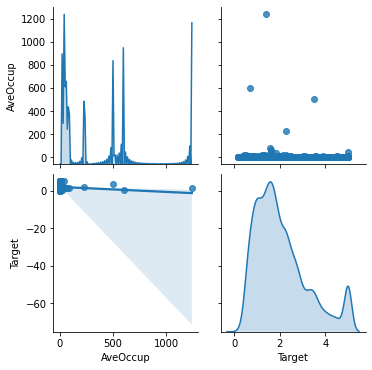

In [20]:
data_plot=pd.concat([plot_data['AveOccup'],target_data],axis=1)
data_plot
sns.pairplot(data_plot,kind='reg',diag_kind='kde')

**Model selection and Hyperparamater Tuning** \
We will use a regression model and Linear regression to predict the target value

**Data splitting:** X and y are split into training and testing sets using train_set_split from sklearn. \
In this code the training set is 70% of the dataset and the test set is 30% of the dataset.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.3, random_state=0) 

We use a linear regression object from sklearn

In [23]:
reg = linear_model.LinearRegression()

Fitting the model

In [24]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Show regressions coefficients

In [25]:
reg.coef_

array([ 1.01152675,  0.23711646, -0.27160437,  0.15916718,  0.04799492,
       -0.24773335])

Show the Regression Score

In [26]:
Y_pred = reg.predict(X_test)
reg.score(X_train,y_train)

0.5810732627650769

Plot the result

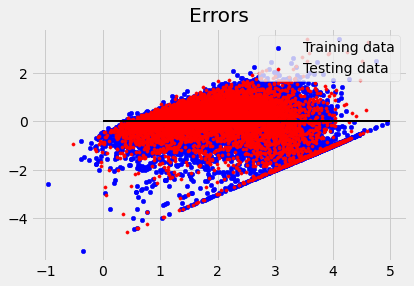

In [30]:
plt.style.use('seaborn-pastel') 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "blue", s = 20, label = 'Training data') #Error in train data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "red", s = 10, label = 'Testing data') #Error in Test data
plt.hlines(y = 0, xmin = 0, xmax = 5, linewidth = 2) #Residual Error Line
plt.legend(loc = 'upper right') 
plt.title("Errors") 
plt.show() 

**v) Cross Validation** using k-fold

We use the RBF kernel of the SVR model, implemented using the sklearn library.

We set the folds to be 10. The error metric computed using the best_svr.score() function is the r2 score. Each iteration of K-Fold provides an r2 score.

Scores are appended to a list and get the mean value in order to determine the overall accuracy of the model.

In [31]:
values = []

best_svr = SVR(kernel='rbf')

cv = KFold(n_splits=10, random_state=0, shuffle=False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    # Specifying the Train data set
    best_svr.fit(X_train, y_train)
    values.append(best_svr.score(X_test, y_test.ravel()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [ 2064  2065  2066 ... 20637 20638 20639] 

Test Index:  [   0    1    2 ... 2061 2062 2063]
Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [2064 2065 2066 ... 4125 4126 4127]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [4128 4129 4130 ... 6189 6190 6191]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [6192 6193 6194 ... 8253 8254 8255]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [ 8256  8257  8258 ... 10317 10318 10319]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [10320 10321 10322 ... 12381 12382 12383]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [12384 12385 12386 ... 14445 14446 14447]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [14448 14449 14450 ... 16509 16510 16511]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 20637 20638 20639] 

Test Index:  [16512 16513 16514 ... 18573 18574 18575]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [    0     1     2 ... 18573 18574 18575] 

Test Index:  [18576 18577 18578 ... 20637 20638 20639]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Calculate mean of values, hence accuracy of model

In [32]:
print(np.mean(values))

0.5941101417806827


**What happens when we increase the value of K?**

In [36]:
value2=cross_val_score(best_svr, X, y.ravel(), cv=20)# Reduce cv for faster computation time
print(np.mean(value2))

0.44583962011599265


**CONCLUSION** \
As we increase the value of K, accuracy decreases.